# Importamos las librerias que utilizaremos
# Objetivo
Crear una red neuronal tipo LSTM y time series Generator

In [1]:
# importamoes las librerias clásicas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

# Importo mi data a analizar

In [2]:
link = 'https://raw.githubusercontent.com/OrlandoBelli/curso-series-temporales/master/13.%20Redes%20Neuronales/Python/Alcohol_Sales.csv'

df = pd.read_csv(link,index_col='DATE',parse_dates =True)
df.index.freq ='MS'
df.columns = ['Sales']
df.head(13)

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
1992-06-01,4529
1992-07-01,4466
1992-08-01,4137
1992-09-01,4126


In [3]:
df.dtypes

Sales    int64
dtype: object

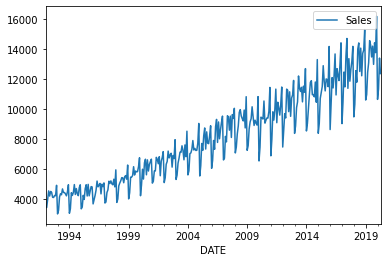

In [4]:
df.plot()

In [5]:
# Train Test Split

len(df) , len(df)-12


(340, 328)

In [6]:
train=df.iloc[:len(df)-12]
test=df.iloc[len(df)-12:]

In [7]:
len(train),len(test)

(328, 12)

Escalar data

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler = scaler.fit(train)

In [11]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
scaled_train[:6]

array([[0.03486194],
       [0.03478048],
       [0.07909098],
       [0.12486764],
       [0.09692922],
       [0.12201678]])

In [14]:
# Definimos el generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size=1)

In [15]:
len(train)

328

In [16]:
len(generator) # n_input = 2

326

In [17]:
scaled_train[:5]

array([[0.03486194],
       [0.03478048],
       [0.07909098],
       [0.12486764],
       [0.09692922]])

In [18]:
# ¿Cómo luce el primer batch?
generator[0]

(array([[[0.03486194],
         [0.03478048]]]), array([[0.07909098]]))

In [19]:
X,y = generator[0]

In [20]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.03486194 0.03478048]
Predicción: 
 [[0.07909098]]


In [21]:
# Vamos a redefinir para que utilice 12 meses y luego prediga el próximo mes
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size=1)

In [22]:
# ¿Cómo luce el primer batch?
X,y = generator[0]

In [23]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03486194 0.03478048 0.07909098 0.12486764 0.09692922 0.12201678
 0.11688523 0.09008715 0.08919117 0.10002444 0.09847683 0.1551682 ]
Predict this y: 
 [[0.]]


# Creando el modelo LSTM

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [25]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [27]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


316/316 [==============================] - 4s 7ms/step - loss: 0.0188
Epoch 2/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0085
Epoch 3/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0082
Epoch 4/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0074
Epoch 5/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0072
Epoch 6/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0055
Epoch 7/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0042
Epoch 8/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0039
Epoch 9/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0029
Epoch 10/50
316/316 [==============================] - 2s 7ms/step - loss: 0.0021
Epoch 11/50
316/316 [==============================] - 2s 6ms/step - loss: 0.0022
Epoch 12/50
316/316 [==============================] - 2s 6ms/step - loss: 0.0020
Epoch 13/50
316/316 [===============

In [28]:
model.history.history.keys()

dict_keys(['loss'])

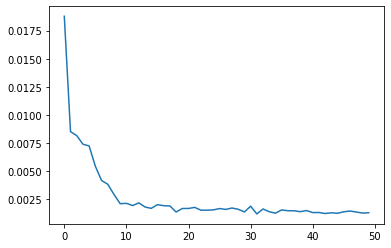

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

# Evaluando datos de prueba

In [30]:
# 12 meses de historia ---> predecir el 13
# Necesitaremos los últimos 12 meses del conjunto de entrenamiento para predecir el 1er mes en el conjunto de prueba
first_eval_batch = scaled_train[-12:]

In [31]:
first_eval_batch

array([[0.89443675],
       [0.92766963],
       [0.77274578],
       [0.89940539],
       [0.74936874],
       [0.87122261],
       [0.8893052 ],
       [1.        ],
       [0.61782194],
       [0.64714507],
       [0.76899894],
       [0.8199886 ]])

In [32]:
X.shape

(1, 12, 1)

In [33]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [34]:
first_eval_batch.shape

(1, 12, 1)

In [35]:
model.predict(first_eval_batch)

array([[0.9265277]], dtype=float32)

In [36]:
scaled_test

array([[0.94013195],
       [0.91602183],
       [0.8514295 ],
       [0.9101572 ],
       [0.81135457],
       [0.9282398 ],
       [0.87496946],
       [1.07241183],
       [0.62132443],
       [0.67760854],
       [0.84540197],
       [0.76134235]])

# función recursiva
Ahora pongamos esta lógica en un bucle for para predecir el futuro para todo el rango de prueba.

In [37]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [38]:
test_predictions

[array([0.9265277], dtype=float32),
 array([0.9429142], dtype=float32),
 array([0.8260144], dtype=float32),
 array([0.9248539], dtype=float32),
 array([0.7990377], dtype=float32),
 array([0.915797], dtype=float32),
 array([0.9260697], dtype=float32),
 array([1.0201521], dtype=float32),
 array([0.65705746], dtype=float32),
 array([0.72116476], dtype=float32),
 array([0.8061871], dtype=float32),
 array([0.87532413], dtype=float32)]

In [39]:
scaled_test

array([[0.94013195],
       [0.91602183],
       [0.8514295 ],
       [0.9101572 ],
       [0.81135457],
       [0.9282398 ],
       [0.87496946],
       [1.07241183],
       [0.62132443],
       [0.67760854],
       [0.84540197],
       [0.76134235]])

Transformación inversa y Comparación

In [40]:
# son los valores originales de las predicciones data test
true_predictions = scaler.inverse_transform(test_predictions)

In [41]:
true_predictions

array([[14405.98031467],
       [14607.15748495],
       [13171.97878301],
       [14385.43158734],
       [12840.78578067],
       [14274.23970962],
       [14400.35742301],
       [15555.40723324],
       [11097.69448704],
       [11884.73979503],
       [12928.55894393],
       [13777.35434473]])

In [42]:
test

,Sales
DATE,
2019-05-01,14573
2019-06-01,14277
2019-07-01,13484
2019-08-01,14205
2019-09-01,12992
2019-10-01,14427
2019-11-01,13773
2019-12-01,16197
2020-01-01,10659


In [43]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
test

,Sales,Predictions
DATE,,
2019-05-01,14573,14405.980315
2019-06-01,14277,14607.157485
2019-07-01,13484,13171.978783
2019-08-01,14205,14385.431587
2019-09-01,12992,12840.785781
2019-10-01,14427,14274.239710
2019-11-01,13773,14400.357423
2019-12-01,16197,15555.407233
2020-01-01,10659,11097.694487


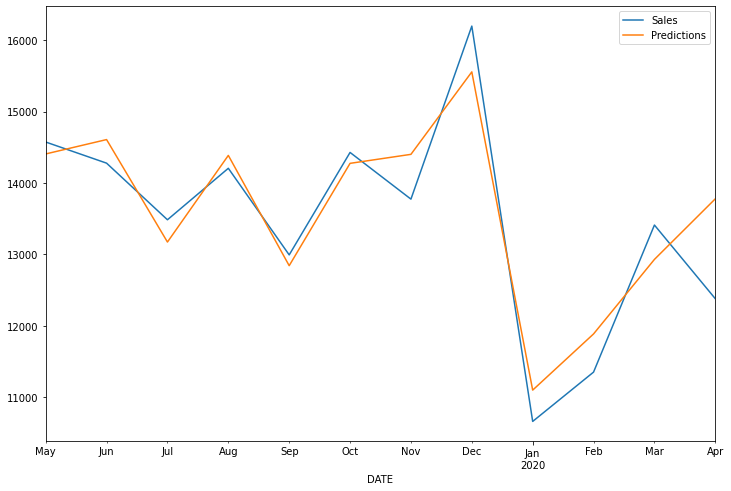

In [45]:
test.plot(figsize=(12,8))

Guardar el modelo

In [46]:
model.save('my_rnn_model.h5')

Cargar el modelo

In [47]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [48]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
